In [1]:

import numpy as np # linear algebra
import pandas as pd 
import os

In [2]:
data_cross = pd.read_csv('oasis_cross-sectional.csv')
data_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [3]:
data_long = pd.read_csv('oasis_longitudinal.csv')
data_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
data_long = data_long.rename(columns={'EDUC':'Educ'})

In [5]:
data = pd.concat([data_cross, data_long])
data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Subject ID,MRI ID,Group,Visit,MR Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,NaN,NaN,NaN,NaN,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,NaN,NaN,NaN,NaN,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN,NaN,NaN,NaN,NaN,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN,NaN,NaN,NaN,NaN,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
data.shape

(809, 17)

In [8]:
data.dtypes

ID             object
M/F            object
Hand           object
Age             int64
Educ          float64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
Delay         float64
Subject ID     object
MRI ID         object
Group          object
Visit         float64
MR Delay      float64
dtype: object

In [9]:
data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Visit,MR Delay
count,809.000000,608.000000,570.00000,606.000000,608.000000,809.000000,809.000000,809.000000,20.00000,373.000000,373.000000
mean,63.186650,10.184211,2.47193,27.234323,0.288651,1484.782447,0.763037,1.197311,20.55000,1.882038,595.104558
std,23.117511,6.058388,1.12805,3.687980,0.377697,166.911689,0.059401,0.133031,23.86249,0.922843,635.485118
min,18.000000,1.000000,1.00000,4.000000,0.000000,1106.000000,0.644000,0.876000,1.00000,1.000000,0.000000
25%,49.000000,4.000000,2.00000,26.000000,0.000000,1361.000000,0.715000,1.108000,2.75000,1.000000,0.000000
50%,72.000000,12.000000,2.00000,29.000000,0.000000,1475.000000,0.754000,1.190000,11.00000,2.000000,552.000000
75%,80.000000,16.000000,3.00000,30.000000,0.500000,1583.000000,0.817000,1.290000,30.75000,2.000000,873.000000
max,98.000000,23.000000,5.00000,30.000000,2.000000,2004.000000,0.893000,1.587000,89.00000,5.000000,2639.000000


In [10]:
data.isnull().sum()

ID            373
M/F             0
Hand            0
Age             0
Educ          201
SES           239
MMSE          203
CDR           201
eTIV            0
nWBV            0
ASF             0
Delay         789
Subject ID    436
MRI ID        436
Group         436
Visit         436
MR Delay      436
dtype: int64

In [11]:
for column in data.columns:
    mode_value = data[column].mode()[0]  
    data[column].fillna(mode_value, inplace=True)

missing_values_after_filling = data.isnull().sum()
print(missing_values_after_filling)


ID            0
M/F           0
Hand          0
Age           0
Educ          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
Delay         0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
dtype: int64


In [12]:
data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Subject ID,MRI ID,Group,Visit,MR Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,2.0,OAS2_0048,OAS2_0001_MR1,Nondemented,1.0,0.0
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,2.0,OAS2_0048,OAS2_0001_MR1,Nondemented,1.0,0.0
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,2.0,OAS2_0048,OAS2_0001_MR1,Nondemented,1.0,0.0
3,OAS1_0004_MR1,M,R,28,12.0,2.0,30.0,0.0,1588,0.803,1.105,2.0,OAS2_0048,OAS2_0001_MR1,Nondemented,1.0,0.0
4,OAS1_0005_MR1,M,R,18,12.0,2.0,30.0,0.0,1737,0.848,1.010,2.0,OAS2_0048,OAS2_0001_MR1,Nondemented,1.0,0.0


(15.3, 30.0)

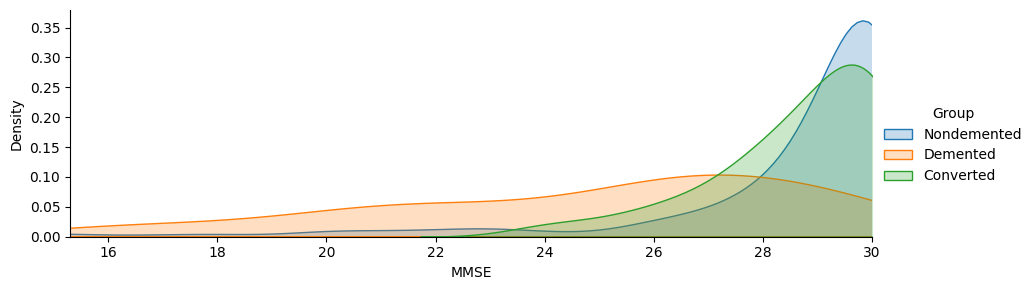

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, data['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_val_score

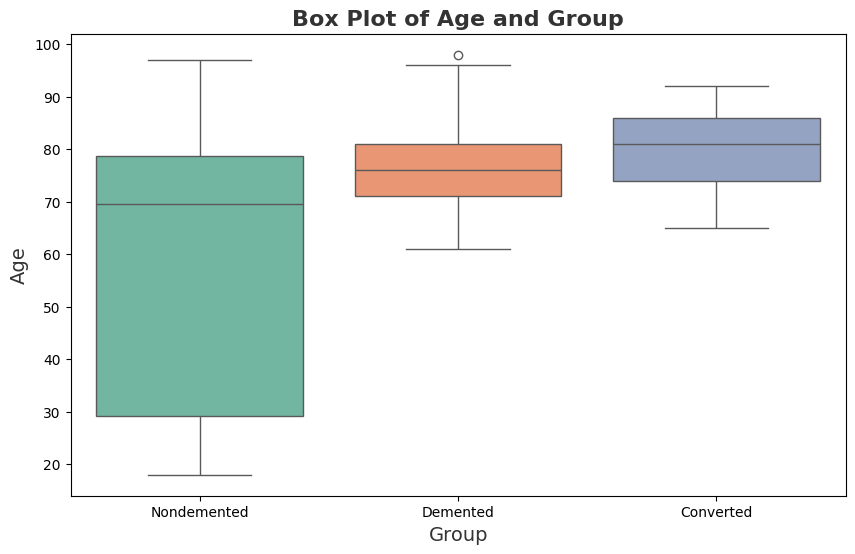

In [15]:
import pandas as pd

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Age', data=data, palette='Set2')
plt.title('Box Plot of Age and Group', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Group', fontsize=14, color='#333333')
plt.ylabel('Age', fontsize=14, color='#333333')
plt.show()

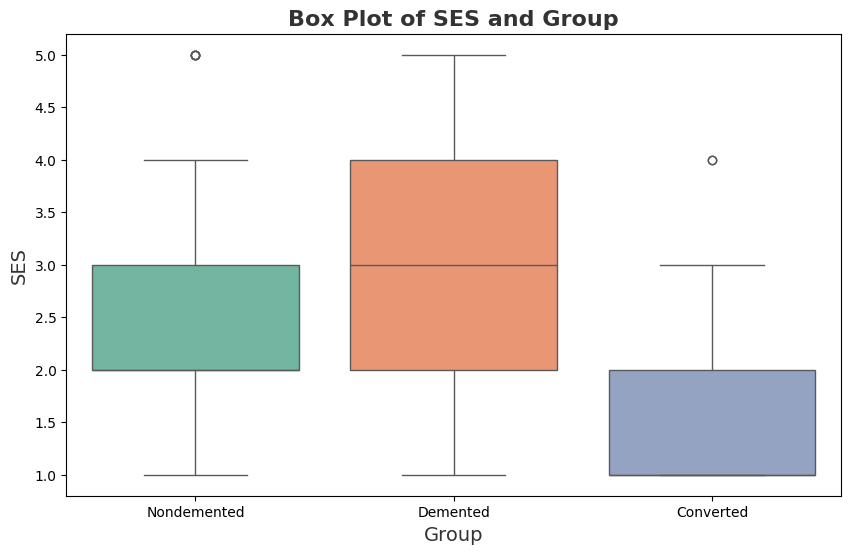

In [16]:
import pandas as pd

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='SES', data=data, palette='Set2')
plt.title('Box Plot of SES and Group', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Group', fontsize=14, color='#333333')
plt.ylabel('SES', fontsize=14, color='#333333')
plt.show()

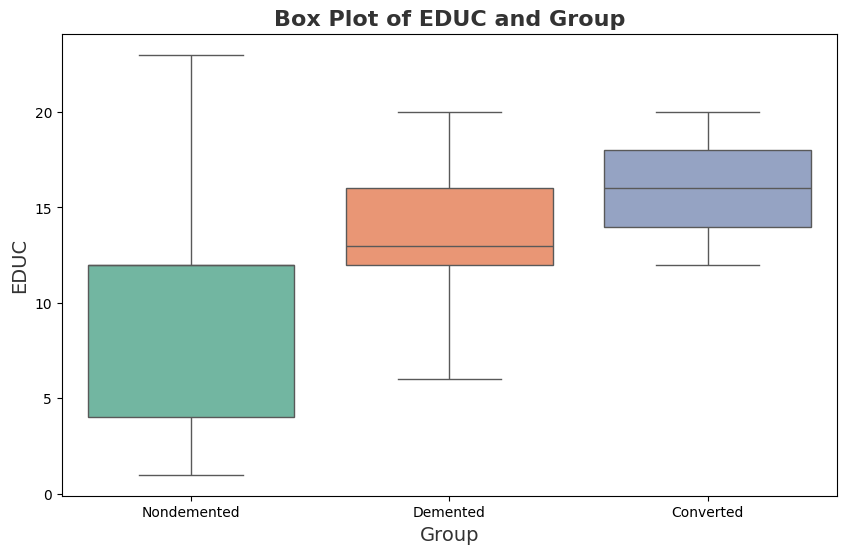

In [17]:
import pandas as pd

plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Educ', data=data, palette='Set2')
plt.title('Box Plot of EDUC and Group', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Group', fontsize=14, color='#333333')
plt.ylabel('EDUC', fontsize=14, color='#333333')
plt.show()

<Axes: title={'center': 'Normal Distribution'}, xlabel='SES', ylabel='Density'>

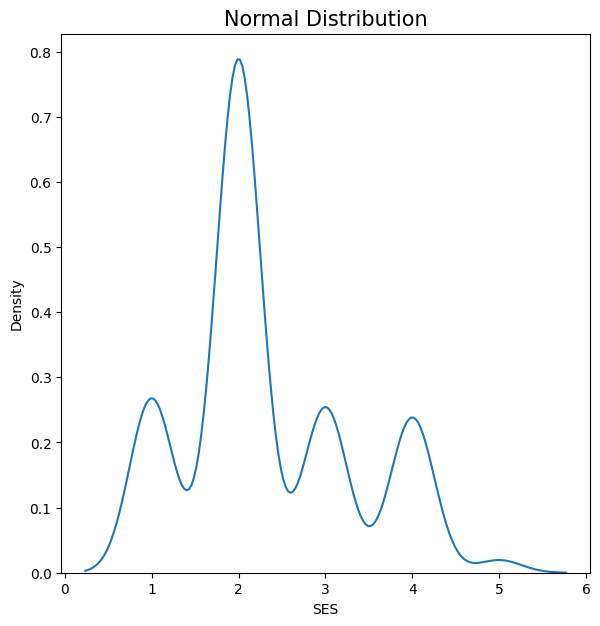

In [18]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Normal Distribution", fontsize=15)
sns.kdeplot(data = data["SES"])

In [19]:
data.columns

Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Delay', 'Subject ID', 'MRI ID', 'Group', 'Visit',
       'MR Delay'],
      dtype='object')

In [20]:
X = data.drop(['Group', 'ID', 'Delay', 'Subject ID', 'MRI ID', 'Visit', 'MR Delay'], axis=1)
y = data['Group']

In [21]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [22]:

scale = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV','nWBV', 'ASF']
ohe = ['M/F', 'Hand']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale),
        ('ohe', OneHotEncoder(), ohe)
    ])

In [25]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [26]:
label = LabelEncoder()
y_train_label = label.fit_transform(y_train)
y_test_label = label.transform(y_val)

In [27]:
pipeline.fit(X_train, y_train_label)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scale', ...), ('ohe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [28]:
accuracy = pipeline.score(X_val, y_test_label)
print(f'RandomForestClassifier Model Accuracy: {accuracy}')

RandomForestClassifier Model Accuracy: 0.9629629629629629


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [30]:
# Create the pipeline with a Logistic Regression classifier
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
pipeline_lr.fit(X_train, y_train_label)

# Predict on the validation set
y_pred_lr = pipeline_lr.predict(X_val)

# Calculate and print the accuracy
accuracy_lr = accuracy_score(y_test_label, y_pred_lr)
print(f'Logistic Regression Model Accuracy: {accuracy_lr * 100:.2f}%')

Logistic Regression Model Accuracy: 90.12%


In [31]:
# Create the pipeline with an SVC classifier
# We set probability=True for soft voting later
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, probability=True))
])

# Train the model
pipeline_svc.fit(X_train, y_train_label)

# Predict on the validation set
y_pred_svc = pipeline_svc.predict(X_val)

# Calculate and print the accuracy
accuracy_svc = accuracy_score(y_test_label, y_pred_svc)
print(f'Support Vector Classifier Model Accuracy: {accuracy_svc * 100:.2f}%')

Support Vector Classifier Model Accuracy: 92.59%


In [32]:
# Create the pipeline with an XGBoost classifier
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Train the model
pipeline_xgb.fit(X_train, y_train_label)

# Predict on the validation set
y_pred_xgb = pipeline_xgb.predict(X_val)

# Calculate and print the accuracy
accuracy_xgb = accuracy_score(y_test_label, y_pred_xgb)
print(f'XGBoost Classifier Model Accuracy: {accuracy_xgb * 100:.2f}%')

XGBoost Classifier Model Accuracy: 96.30%


# Ensemble

In [33]:
from sklearn.ensemble import VotingClassifier

# 1. Define the individual models (estimators)
# You can use the pipelines directly if you prefer, but this is often clearer.
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(random_state=42, probability=True) # Must have probability=True for soft voting
clf3 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 2. Create the Voting Classifier
# 'voting=soft'' averages the prediction probabilities, which usually performs better than 'hard' voting (majority rule).
eclf1 = VotingClassifier(estimators=[('rf', clf1), ('svc', clf2), ('xgb', clf3)], voting='soft')

# 3. Create a pipeline for the ensemble
pipeline_ensemble = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', eclf1)
])

# 4. Train the ensemble model
pipeline_ensemble.fit(X_train, y_train_label)

# 5. Predict and evaluate
y_pred_ensemble = pipeline_ensemble.predict(X_val)
accuracy_ensemble = accuracy_score(y_test_label, y_pred_ensemble)

print(f'Ensemble (Voting Classifier) Model Accuracy: {accuracy_ensemble * 100:.2f}%')

Ensemble (Voting Classifier) Model Accuracy: 96.30%


# 1. Hyperparameter Tuning (Most Important Next Step)


In [34]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Apply the preprocessing to your training and validation data
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# Now, X_train_processed and X_val_processed are ready for tuning
print('Data preprocessing complete.')

Data preprocessing complete.


In [35]:
# 2. Define the hyperparameter grid to search
# These are some of the most important parameters for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# 3. Set up the RandomizedSearchCV
# n_iter=100 will test 100 different combinations.
# cv=5 means 5-fold cross-validation.
# n_jobs=-1 uses all available CPU cores to speed up the process.
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 4. Run the search on the preprocessed data
print("Starting hyperparameter tuning...")
random_search.fit(X_train_processed, y_train_label)
print("Tuning complete.")

# 5. Get the best model and evaluate it
print(f"Best parameters found: {random_search.best_params_}")

best_xgb = random_search.best_estimator_
y_pred_tuned = best_xgb.predict(X_val_processed)
accuracy_tuned = accuracy_score(y_test_label, y_pred_tuned)

print(f'Tuned XGBoost Model Accuracy: {accuracy_tuned * 100:.2f}%')

Starting hyperparameter tuning...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Tuning complete.
Best parameters found: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
Tuned XGBoost Model Accuracy: 96.30%


# 2. Check for Class Imbalance

In [36]:
# Check the distribution of the target variable
print("Class Distribution:")
print(y.value_counts(normalize=True) * 100)

Class Distribution:
Group
Nondemented    77.379481
Demented       18.046972
Converted       4.573548
Name: proportion, dtype: float64


# SMOTE Applying

In [38]:
!pip install imbalanced-learn

In [39]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score

# 1. Define the steps for the new pipeline, including SMOTE
# We will use the best XGBoost parameters you found during tuning.
smote_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
        subsample=0.6,
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        gamma=0.1,
        colsample_bytree=0.6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# 2. Train the new pipeline on the ORIGINAL training data
# The pipeline will handle preprocessing and SMOTE internally
print("Training model with SMOTE to handle class imbalance...")
smote_pipeline.fit(X_train, y_train_label)
print("Training complete.")

# 3. Make predictions on the validation set
y_pred_smote = smote_pipeline.predict(X_val)

# 4. Evaluate with better metrics for imbalanced data
accuracy_smote = accuracy_score(y_test_label, y_pred_smote)
balanced_accuracy_smote = balanced_accuracy_score(y_test_label, y_pred_smote)

print(f"\\nTuned XGBoost with SMOTE - Accuracy: {accuracy_smote * 100:.2f}%")
print(f"Tuned XGBoost with SMOTE - Balanced Accuracy: {balanced_accuracy_smote * 100:.2f}%")

# Print a detailed report to see performance on each class
print("\\nClassification Report:")
print(classification_report(y_test_label, y_pred_smote, target_names=label.classes_))

Training model with SMOTE to handle class imbalance...
Training complete.
\nTuned XGBoost with SMOTE - Accuracy: 95.68%
Tuned XGBoost with SMOTE - Balanced Accuracy: 77.93%
\nClassification Report:
              precision    recall  f1-score   support

   Converted       0.75      0.38      0.50         8
    Demented       0.92      0.97      0.94        35
 Nondemented       0.98      0.99      0.98       119

    accuracy                           0.96       162
   macro avg       0.88      0.78      0.81       162
weighted avg       0.95      0.96      0.95       162



# High Accuracy 

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings

warnings.filterwarnings("ignore")

# --- Step 1: Load and Clean Data ---

# Load the datasets
data_cross = pd.read_csv('oasis_cross-sectional.csv')
data_long = pd.read_csv('oasis_longitudinal.csv')

# Rename column for consistency
data_long = data_long.rename(columns={'EDUC': 'Educ'})

# Concatenate the dataframes
data = pd.concat([data_cross, data_long])

# CRUCIAL FIX: Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Fill missing values with the mode of each column
for column in data.columns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

print("Data loading and cleaning complete.")
print("-" * 30)

# --- Step 2: Simplify to a Binary Classification Task ---

# Combine 'Converted' and 'Demented' classes into a single 'Demented' class
y_binary = data['Group'].replace({'Converted': 'Demented'})

# Define features (X) by dropping ID columns and the original target
X = data.drop(['Group', 'ID', 'Delay', 'Subject ID', 'MRI ID', 'Visit', 'MR Delay'], axis=1)

print("New Binary Class Distribution:")
print(y_binary.value_counts(normalize=True) * 100)
print("-" * 30)


# --- Step 3: Create Training and Validation Sets ---

# Split the data, ensuring the class distribution is maintained in both sets (stratify)
X_train, X_val, y_train, y_val = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Encode the target labels (0 for 'Demented', 1 for 'Nondemented')
label_encoder = LabelEncoder()
y_train_label = label_encoder.fit_transform(y_train)
y_test_label = label_encoder.transform(y_val)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print("-" * 30)


# --- Step 4: Define the Preprocessing Pipeline ---

# Define which columns to scale and which to one-hot encode
scale_cols = ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
ohe_cols = ['M/F', 'Hand']

# Create the ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), scale_cols),
        ('ohe', OneHotEncoder(), ohe_cols)
    ])


# --- Step 5: Define, Train, and Evaluate the Final Model Pipeline ---

# Create the final pipeline with preprocessing, SMOTE for balancing, and the tuned XGBoost classifier
final_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(
        objective='binary:logistic',  # Explicitly set for binary classification
        subsample=0.6,
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        gamma=0.1,
        colsample_bytree=0.6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# Train the final model
print("Training final model with SMOTE and tuned XGBoost...")
final_pipeline.fit(X_train, y_train_label)
print("Training complete.")
print("-" * 30)


# --- Step 6: Final Evaluation ---

# Make predictions on the validation set
y_pred_final = final_pipeline.predict(X_val)

# Calculate and print the final performance metrics
accuracy_final = accuracy_score(y_test_label, y_pred_final)
balanced_accuracy_final = balanced_accuracy_score(y_test_label, y_pred_final)

print(f"Final Model - Accuracy: {accuracy_final * 100:.2f}%")
print(f"Final Model - Balanced Accuracy: {balanced_accuracy_final * 100:.2f}%")
print("\\nFinal Classification Report:")
print(classification_report(y_test_label, y_pred_final, target_names=label_encoder.classes_))

Data loading and cleaning complete.
------------------------------
New Binary Class Distribution:
Group
Nondemented    77.379481
Demented       22.620519
Name: proportion, dtype: float64
------------------------------
Training set size: 647
Validation set size: 162
------------------------------
Training final model with SMOTE and tuned XGBoost...
Training complete.
------------------------------
Final Model - Accuracy: 98.15%
Final Model - Balanced Accuracy: 98.80%
\nFinal Classification Report:
              precision    recall  f1-score   support

    Demented       0.93      1.00      0.96        37
 Nondemented       1.00      0.98      0.99       125

    accuracy                           0.98       162
   macro avg       0.96      0.99      0.97       162
weighted avg       0.98      0.98      0.98       162



In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.pipeline import Pipeline as ImbPipeline

# --- Step 1: Define the Base Models ---
# Each base model is a full pipeline that includes preprocessing and SMOTE.
# This ensures that data leakage does not occur during the stacking process.

# Base Model 1: Tuned XGBoost
xgb_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', xgb.XGBClassifier(
        objective='binary:logistic',
        subsample=0.6,
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        gamma=0.1,
        colsample_bytree=0.6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# Base Model 2: Random Forest
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Base Model 3: Support Vector Machine (SVC)
svc_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=42, probability=True, class_weight='balanced'))
])

# --- Step 2: Define the Stacking Classifier ---

# Create a list of our base models
estimators = [
    ('xgb', xgb_pipeline),
    ('rf', rf_pipeline),
    ('svc', svc_pipeline)
]

# The final "manager" model is a Logistic Regression, which is a common and effective choice.
# The StackingClassifier will train the base models and then use their predictions to train the final model.
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5  # Use 5-fold cross-validation to generate the predictions for the final model
)

# --- Step 3: Train and Evaluate the Stacking Model ---
print("Training the Stacking Classifier... (This may take a few minutes)")
# We use the binary-class data from the previous successful step
stacking_classifier.fit(X_train_b, y_train_label_b)
print("Training complete.")
print("-" * 30)

# Make predictions
y_pred_stack = stacking_classifier.predict(X_val_b)

# Evaluate the performance
accuracy_stack = accuracy_score(y_test_label_b, y_pred_stack)
balanced_accuracy_stack = balanced_accuracy_score(y_test_label_b, y_pred_stack)

print(f"Stacking Model - Accuracy: {accuracy_stack * 100:.2f}%")
print(f"Stacking Model - Balanced Accuracy: {balanced_accuracy_stack * 100:.2f}%")
print("\\nStacking Model Classification Report:")
print(classification_report(y_test_label_b, y_pred_stack, target_names=label_encoder_b.classes_))

Training the Stacking Classifier... (This may take a few minutes)
Training complete.
------------------------------
Stacking Model - Accuracy: 98.77%
Stacking Model - Balanced Accuracy: 99.20%
\nStacking Model Classification Report:
              precision    recall  f1-score   support

    Demented       0.95      1.00      0.97        37
 Nondemented       1.00      0.98      0.99       125

    accuracy                           0.99       162
   macro avg       0.97      0.99      0.98       162
weighted avg       0.99      0.99      0.99       162



# Different Models

In [48]:
!pip install tabulate


In [49]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# --- Step 1: Define the models you want to test ---
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

# --- Step 2: Train each model and store the results ---
results = []
print("Training and evaluating various models...")

for model_name, model in models.items():
    # Create a full pipeline for each model to ensure consistent preprocessing and balancing
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    # Train the pipeline
    pipeline.fit(X_train_b, y_train_label_b)
    
    # Make predictions
    y_pred = pipeline.predict(X_val_b)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_label_b, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test_label_b, y_pred)
    
    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Balanced Accuracy": balanced_accuracy
    })
    
    print(f"Finished training {model_name}.")

print("\n--- All models trained successfully! ---")


# --- Step 3: Create and display the comparison table ---

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by Balanced Accuracy
results_df_sorted = results_df.sort_values(by="Balanced Accuracy", ascending=False)

# Format the scores as percentages
results_df_sorted["Accuracy"] = results_df_sorted["Accuracy"].apply(lambda x: f"{x*100:.2f}%")
results_df_sorted["Balanced Accuracy"] = results_df_sorted["Balanced Accuracy"].apply(lambda x: f"{x*100:.2f}%")

# --- ADD THIS LINE TO SEE THE TABLE ---
print("\n--- Model Comparison ---")
print(results_df_sorted.to_markdown(index=False))

Training and evaluating various models...
Finished training Logistic Regression.
Finished training Random Forest.
Finished training Support Vector Machine.
Finished training K-Nearest Neighbors.
Finished training Gaussian Naive Bayes.
Finished training XGBoost.
[LightGBM] [Info] Number of positive: 501, number of negative: 501
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1314
[LightGBM] [Info] Number of data points in the train set: 1002, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [44]:
import joblib

# Save the entire stacking classifier to a file
filename = 'dementia_prediction_model.joblib'
joblib.dump(stacking_classifier, filename)

print(f"Model saved to {filename}")

Model saved to dementia_prediction_model.joblib


In [45]:
# Load the model from the file
loaded_model = joblib.load('dementia_prediction_model.joblib')

# Create some new, hypothetical patient data for demonstration
# Ensure the columns match your original training data (X)
new_patient_data = pd.DataFrame({
    'M/F': ['F'],
    'Hand': ['R'],
    'Age': [78],
    'Educ': [16],
    'SES': [2.0],
    'MMSE': [25],
    'CDR': [0.5],
    'eTIV': [1500],
    'nWBV': [0.68],
    'ASF': [1.18]
})

# Use the loaded model to make a prediction
prediction_encoded = loaded_model.predict(new_patient_data)

# Decode the prediction back to the original label ('Demented' or 'Nondemented')
prediction_label = label_encoder_b.inverse_transform(prediction_encoded)

print(f"\\nThe model predicts the new patient is: {prediction_label[0]}")

\nThe model predicts the new patient is: Demented
